# Proyecto Final: Análisis de Imágenes de Rayos X en el Diágnostico de Neumonia

Author: Amaro, A.




Descripción de la enfermedad: La neumonia o pulmonía es una enfermedad del sistema respiratorio que consiste en la inflamación de naturaleza infecciosa de los espacios alveorales de los pulmones.

La neumonía hace que el tejido que forma los pulmones se inflame. El diagnóstico se fundamenta tanto en la clínica del paciente como en el resultado de la radiografía de tórax (Rx).

Donde esta última es la forma estándar de diágnostico en hospitales con acceso a rayos X.

Referencia:
Neumonía. (2023, 19 de noviembre). Wikipedia, La enciclopedia libre. Fecha de consulta: 04:20, noviembre 19, 2023 desde https://es.wikipedia.org/w/index.php?title=Neumon%C3%ADa&oldid=155475587.



Próposito: A partir de imágenes de radiografías de pacientes sanos y enfermos de neuomonia desarrollar un red que permita apoyar el diágnostico de la enfermedad, con una precisión superior al 90%

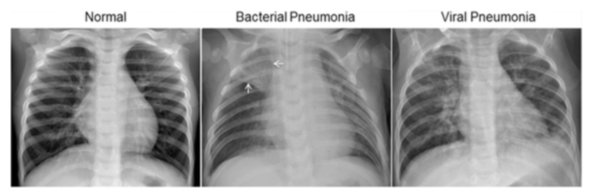

# Procedimiento

A partir de la página https://www.kaggle.com/ fue posible conseguir el dataset: "Chest X-Ray Images (Pneumonia)" disponible en el siguiente enlace: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

Este dataset contiene 5,862 radiografías de rayos X de pacientes sanos y con Pneumonia. Las 5,000 imágenes vienen clasificadas en 3 carpetas: Train, val y test, cada una con la siguiente cantidad:

Train Normal: 1341
Train Pneum : 3876


Test Normal: 234
Test Pneumo: 390


Val Normal: 8
Val Pneumo: 9


Para abordar este problema se creará un Convolutional Neuronal Network (CNN) para el procesamiento de imágenes en el mapeado al estado de salud de los individuos.

[Articulo: Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning](https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5)

# Separacion de datos

Para realizar un análisis completo reuní todas las carpetas en dos carpetas: Pneumonia y Saludable.

Donde para Pneumonia se cuentan con 4,273 imagenes y para Saludable con 1,583.

# Problema central - Resolución  y creación del DataFrame

Dado que las imagenes presentan una resolución variable, es decir, poseen un ancho y largo desigual, reescalamos las imagenes a 256x256. Esta resolución es suficiente para nuestro análisis y reduce el consumo de procesamiento.

Para reescalar las imagenes se utilizará OpenCV.

In [ ]:
# Primero se realiza la instalación de opencv mediante:
#  conda install -c conda-forge opencv

In [ ]:
# Importamos las librerias a usar
import os
import cv2

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as img
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import pandas as pd
import numpy as np

In [ ]:
# En esta parte del codigo obtenemos los valores promedio de pixeles de alto y ancho

# Ruta: "C:\Users\blume\OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO\Python\TSFC_IA\Proyecto Final\Chest_X_Ray_Images_Pneumonia\Datos\Saludable"
carpeta_imagenes_saludables = "C:/Users/blume/OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO/Python/TSFC_IA/Proyecto Final/Chest_X_Ray_Images_Pneumonia/Datos/Saludable"
carpeta_imagenes_pneumo = "C:/Users/blume/OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO/Python/TSFC_IA/Proyecto Final/Chest_X_Ray_Images_Pneumonia/Datos/Pneumonia"

imagen = None

alto_list_saludable = []
ancho_list_saludable = []

alto_list_pneumo = []
ancho_list_pneumo = []

# ------------------------ Saludable ------------------------------

for nombre_archivo in os.listdir(carpeta_imagenes_saludables): # Leemos cada imagen en la lista 1
    ruta_archivo = os.path.join(carpeta_imagenes_saludables, nombre_archivo) # Obtenemos la ruta

    try:
        imagen = img.imread(ruta_archivo) # Leemos la imagen
    except:
        print('Error encontrado en: ' , ruta_archivo, '\n' )

    if imagen is not None: # Si la imagen es correcta:

        try:
            if( len(imagen.shape) == 2  ):
                alto, ancho = imagen.shape

                alto_list_saludable.append(alto)
                ancho_list_saludable.append(ancho)

            elif(len(imagen.shape) == 3):
                alto, ancho, canal = imagen.shape

                alto_list_saludable.append(alto)
                ancho_list_saludable.append(ancho)

        except:
            print('Error encontrado en: ', ruta_archivo, '\n')

print('\n Proceso completado para las imagenes saludables. \n Obteniendo promedio... \n')

mean_saludable_alto = sum(alto_list_saludable) / len(alto_list_saludable)
mean_saludable_ancho = sum(ancho_list_saludable) / len(ancho_list_saludable)

print('\nPromedio de alto en saludable:', mean_saludable_alto )
print('\nPromedio de ancho en saludable:', mean_saludable_ancho)

# ----------------------------- Pneumo ------------------
for nombre_archivo in os.listdir(carpeta_imagenes_pneumo): # Leemos cada imagen en la lista 1
    ruta_archivo = os.path.join(carpeta_imagenes_pneumo, nombre_archivo) # Obtenemos la ruta

    try:
        imagen = img.imread(ruta_archivo) # Leemos la imagen
    except:
        print('Error encontrado en: ' , ruta_archivo )

    if imagen is not None: # Si la imagen es correcta:

        try:
            if( len(imagen.shape) == 2  ):
                alto, ancho = imagen.shape

                alto_list_pneumo.append(alto)
                ancho_list_pneumo.append(ancho)

            elif(len(imagen.shape) == 3):
                alto, ancho, canal = imagen.shape

                alto_list_pneumo.append(alto)
                ancho_list_pneumo.append(ancho)

        except:
            print('Error encontrado en: ', ruta_archivo)

print('\nProceso completado para las imagenes Pneumo. \n Obteniendo promedio... \n')

mean_pneumo_alto = sum(alto_list_pneumo) / len(alto_list_pneumo)
mean_pneumo_ancho = sum(ancho_list_pneumo) / len(ancho_list_pneumo)

print('\nPromedio de alto en Pneumo:', mean_pneumo_alto )
print('\nPromedio de ancho en Pneumo:', mean_pneumo_ancho)

# ------------------------------------------- Solucion -------------------------
print('\nDe esta manera, los valores definitivos de promedio entre ambos datos es: \n')
alto_mean = (mean_pneumo_alto + mean_saludable_alto)/2
ancho_mean = (mean_pneumo_ancho + mean_saludable_ancho)/2

print('\nAlto:', alto_mean)
print('\nAncho:', ancho_mean)


Error encontrado en:  C:/Users/blume/OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO/Python/TSFC_IA/Proyecto Final/Chest_X_Ray_Images_Pneumonia/Datos/Saludable\desktop.ini 


 Proceso completado para las imagenes saludables. 
 Obteniendo promedio... 


Promedio de alto en saludable: 1378.6487681617182

Promedio de ancho en saludable: 1686.3796588755526
Error encontrado en:  C:/Users/blume/OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO/Python/TSFC_IA/Proyecto Final/Chest_X_Ray_Images_Pneumonia/Datos/Pneumonia\desktop.ini

Proceso completado para las imagenes Pneumo. 
 Obteniendo promedio... 


Promedio de alto en saludable: 819.6668226485727

Promedio de ancho en saludable: 1195.1555919513337

De esta manera, los valores definitivos de promedio entre ambos datos es: 


Alto: 1099.1577954051454

Ancho: 1440.767625413443


Como puede observarse, la mayoria de imagenes posee un alto de: 1,100 y un ancho de: 1440

# Consejo: Rescalar todas las imágenes a 256x256
Esto se debe a que reducir la resolución a 256 pp permitirá un procesamiento más rápido y eficiente durante el entrenamiento de la red neuronal convolucional (CNN), sin comprometer demasiado la calidad de las imágenes. Además, al tener imágenes más pequeñas, es posible trabajar con lotes de datos más grandes, lo que puede mejorar el rendimiento y acelerar el entrenamiento de la CNN

In [ ]:
# De esta manera, reescalamos a 256X256

# Reescalamos las imagenes
nuevo_ancho = 256
nuevo_alto = 256

# Declaramos de donde se tomaran las imagenes y donde se escribiran
carpeta_imagenes = "C:/Users/blume/OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO/Python/TSFC_IA/Proyecto Final/Chest_X_Ray_Images_Pneumonia/Datos/Saludable"
nueva_carpeta_imagenes = 'Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/'

# Lee cada imagen y reescala
i = 1
for nombre_archivo in os.listdir(carpeta_imagenes): # Tomamos cada imagen de la carpeta
    ruta_archivo = os.path.join(carpeta_imagenes, nombre_archivo) # Tomamos la ruta de la imagen

    try:
        imagen = img.imread(ruta_archivo) # Cargamos la imagen
        imagen_redimensionada = cv2.resize(imagen, (nuevo_ancho, nuevo_alto)) # Redimensionamos la imagen

    except:
        print('No fue posible leer:' , ruta_archivo)

    # Guardamos la imagen reescalada
    nuevo_nombre_archivo = 'saludable_' + str(i) + '.jpg'
    i+=1

    try:
        ruta_archivo = nueva_carpeta_imagenes + nuevo_nombre_archivo
        cv2.imwrite(ruta_archivo , imagen_redimensionada)
    except:
        print('No fue posible escribir:', ruta_archivo)
    else:
        print('Escrita en:' , ruta_archivo)



No fue posible leer: C:/Users/blume/OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO/Python/TSFC_IA/Proyecto Final/Chest_X_Ray_Images_Pneumonia/Datos/Saludable\desktop.ini
No fue posible escribir: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_2.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_3.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_4.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_5.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_6.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_7.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_8.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_9.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_10.jpg
Escrita en: 

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_100.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_101.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_102.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_103.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_104.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_105.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_106.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_107.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_108.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_109.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_110.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_111.jpg
Escrita en: Ches

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_201.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_202.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_203.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_204.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_205.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_206.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_207.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_208.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_209.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_210.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_211.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_212.jpg
Escrita en: Ches

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_302.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_303.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_304.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_305.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_306.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_307.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_308.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_309.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_310.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_311.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_312.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_313.jpg
Escrita en: Ches

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_402.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_403.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_404.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_405.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_406.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_407.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_408.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_409.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_410.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_411.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_412.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_413.jpg
Escrita en: Ches

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_502.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_503.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_504.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_505.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_506.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_507.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_508.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_509.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_510.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_511.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_512.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_513.jpg
Escrita en: Ches

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_604.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_605.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_606.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_607.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_608.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_609.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_610.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_611.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_612.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_613.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_614.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_615.jpg
Escrita en: Ches

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_706.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_707.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_708.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_709.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_710.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_711.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_712.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_713.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_714.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_715.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_716.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_717.jpg
Escrita en: Ches

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_809.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_810.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_811.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_812.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_813.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_814.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_815.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_816.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_817.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_818.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_819.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_820.jpg
Escrita en: Ches

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_911.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_912.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_913.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_914.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_915.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_916.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_917.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_918.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_919.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_920.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_921.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_922.jpg
Escrita en: Ches

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1011.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1012.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1013.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1014.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1015.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1016.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1017.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1018.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1019.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1020.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1021.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1022.jpg
Escr

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1111.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1112.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1113.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1114.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1115.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1116.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1117.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1118.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1119.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1120.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1121.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1122.jpg
Escr

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1210.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1211.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1212.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1213.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1214.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1215.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1216.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1217.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1218.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1219.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1220.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1221.jpg
Escr

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1311.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1312.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1313.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1314.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1315.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1316.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1317.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1318.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1319.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1320.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1321.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1322.jpg
Escr

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1410.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1411.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1412.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1413.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1414.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1415.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1416.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1417.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1418.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1419.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1420.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1421.jpg
Escr

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1511.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1512.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1513.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1514.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1515.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1516.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1517.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1518.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1519.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1520.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1521.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/saludable_1522.jpg
Escr

In [ ]:
# Realizamos mismo procedimiento para las imagenes de Pneumo
# Reescalamos las imagenes
nuevo_ancho = 256
nuevo_alto = 256

# Declaramos de donde se tomaran las imagenes y donde se escribiran
carpeta_imagenes = "C:/Users/blume/OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO/Python/TSFC_IA/Proyecto Final/Chest_X_Ray_Images_Pneumonia/Datos/Pneumonia"
nueva_carpeta_imagenes = 'Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/'

# Lee cada imagen y reescala
i = 1
for nombre_archivo in os.listdir(carpeta_imagenes): # Tomamos cada imagen de la carpeta
    ruta_archivo = os.path.join(carpeta_imagenes, nombre_archivo) # Tomamos la ruta de la imagen

    try:
        imagen = img.imread(ruta_archivo) # Cargamos la imagen
        imagen_redimensionada = cv2.resize(imagen, (nuevo_ancho, nuevo_alto)) # Redimensionamos la imagen

    except:
        print('No fue posible leer:' , ruta_archivo)

    # Guardamos la imagen reescalada
    nuevo_nombre_archivo = 'pneumo_' + str(i) + '.jpg'
    i+=1

    try:
        ruta_archivo = nueva_carpeta_imagenes + nuevo_nombre_archivo
        cv2.imwrite(ruta_archivo , imagen_redimensionada)
    except:
        print('No fue posible escribir:', ruta_archivo)
    else:
        print('Escrita en:' , ruta_archivo)


No fue posible leer: C:/Users/blume/OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO/Python/TSFC_IA/Proyecto Final/Chest_X_Ray_Images_Pneumonia/Datos/Pneumonia\desktop.ini
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_5.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_6.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_7.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_8.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_9.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_10.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_11.jpg
Escrita en

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_114.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_115.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_116.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_117.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_118.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_119.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_120.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_121.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_122.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_123.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_124.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_125.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_126.jpg
Escrita en: 

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_229.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_230.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_231.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_232.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_233.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_234.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_235.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_236.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_237.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_238.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_239.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_240.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_241.jpg
Escrita en: 

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_342.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_343.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_344.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_345.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_346.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_347.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_348.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_349.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_350.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_351.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_352.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_353.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_354.jpg
Escrita en: 

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_454.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_455.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_456.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_457.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_458.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_459.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_460.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_461.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_462.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_463.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_464.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_465.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_466.jpg
Escrita en: 

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_565.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_566.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_567.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_568.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_569.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_570.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_571.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_572.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_573.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_574.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_575.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_576.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_577.jpg
Escrita en: 

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_675.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_676.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_677.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_678.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_679.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_680.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_681.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_682.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_683.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_684.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_685.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_686.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_687.jpg
Escrita en: 

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_784.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_785.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_786.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_787.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_788.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_789.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_790.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_791.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_792.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_793.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_794.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_795.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_796.jpg
Escrita en: 

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_893.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_894.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_895.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_896.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_897.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_898.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_899.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_900.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_901.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_902.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_903.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_904.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_905.jpg
Escrita en: 

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1006.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1007.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1008.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1009.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1010.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1011.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1012.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1013.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1014.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1015.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1016.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1017.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1018.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1116.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1117.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1118.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1119.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1120.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1121.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1122.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1123.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1124.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1125.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1126.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1127.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1128.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1227.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1228.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1229.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1230.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1231.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1232.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1233.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1234.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1235.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1236.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1237.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1238.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1239.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1335.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1336.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1337.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1338.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1339.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1340.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1341.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1342.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1343.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1344.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1345.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1346.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1347.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1443.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1444.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1445.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1446.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1447.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1448.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1449.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1450.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1451.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1452.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1453.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1454.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1455.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1552.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1553.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1554.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1555.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1556.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1557.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1558.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1559.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1560.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1561.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1562.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1563.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1564.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1659.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1660.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1661.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1662.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1663.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1664.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1665.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1666.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1667.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1668.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1669.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1670.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1671.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1770.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1771.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1772.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1773.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1774.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1775.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1776.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1777.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1778.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1779.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1780.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1781.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1782.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1878.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1879.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1880.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1881.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1882.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1883.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1884.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1885.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1886.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1887.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1888.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1889.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1890.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1992.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1993.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1994.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1995.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1996.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1997.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1998.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_1999.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2000.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2001.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2002.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2003.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2004.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2100.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2101.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2102.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2103.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2104.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2105.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2106.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2107.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2108.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2109.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2110.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2111.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2112.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2210.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2211.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2212.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2213.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2214.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2215.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2216.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2217.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2218.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2219.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2220.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2221.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2222.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2317.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2318.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2319.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2320.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2321.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2322.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2323.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2324.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2325.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2326.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2327.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2328.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2329.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2427.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2428.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2429.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2430.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2431.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2432.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2433.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2434.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2435.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2436.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2437.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2438.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2439.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2534.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2535.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2536.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2537.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2538.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2539.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2540.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2541.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2542.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2543.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2544.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2545.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2546.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2642.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2643.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2644.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2645.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2646.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2647.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2648.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2649.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2650.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2651.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2652.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2653.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2654.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2753.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2754.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2755.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2756.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2757.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2758.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2759.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2760.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2761.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2762.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2763.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2764.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2765.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2865.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2866.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2867.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2868.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2869.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2870.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2871.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2872.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2873.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2874.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2875.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2876.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2877.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2976.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2977.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2978.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2979.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2980.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2981.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2982.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2983.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2984.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2985.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2986.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2987.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_2988.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3086.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3087.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3088.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3089.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3090.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3091.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3092.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3093.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3094.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3095.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3096.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3097.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3098.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3199.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3200.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3201.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3202.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3203.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3204.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3205.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3206.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3207.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3208.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3209.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3210.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3211.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3307.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3308.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3309.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3310.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3311.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3312.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3313.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3314.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3315.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3316.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3317.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3318.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3319.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3418.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3419.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3420.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3421.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3422.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3423.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3424.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3425.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3426.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3427.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3428.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3429.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3430.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3525.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3526.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3527.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3528.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3529.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3530.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3531.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3532.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3533.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3534.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3535.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3536.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3537.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3636.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3637.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3638.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3639.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3640.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3641.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3642.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3643.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3644.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3645.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3646.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3647.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3648.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3743.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3744.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3745.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3746.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3747.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3748.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3749.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3750.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3751.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3752.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3753.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3754.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3755.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3855.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3856.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3857.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3858.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3859.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3860.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3861.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3862.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3863.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3864.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3865.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3866.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3867.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3966.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3967.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3968.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3969.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3970.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3971.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3972.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3973.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3974.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3975.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3976.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3977.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_3978.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4073.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4074.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4075.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4076.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4077.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4078.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4079.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4080.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4081.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4082.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4083.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4084.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4085.jpg

Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4182.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4183.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4184.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4185.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4186.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4187.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4188.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4189.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4190.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4191.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4192.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4193.jpg
Escrita en: Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/pneumo_4194.jpg

# Convertimos Img -> Array para la creación del DF
Asignamos una etiqueta:


Saludable -> 0


Pneumonia -> 1

In [ ]:
# Convertimos las imagenes a arrays usando Keras - img_to_array()

carpeta_imagenes = 'Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Saludable/'

imagenes_0 = []

i = 0
for nombre_archivo in os.listdir(carpeta_imagenes): # Tomamos cada imagen de la carpeta
    ruta_archivo = os.path.join(carpeta_imagenes, nombre_archivo) # Tomamos la ruta de la imagen

    try:
        imagen = load_img(ruta_archivo)
        elemento = img_to_array(imagen)
        imagenes_0.append(elemento)
        i+=1

    except:
        print('\nNo fue posible agregar el elemento:' , ruta_archivo)

    else:
        print('\nImagen convertida y guardada en:' , str(i))

print('\n Proceso finalizado. Creando DF...')

etiqueta = np.repeat(0, len(imagenes_0))

df_0 = pd.DataFrame({'Imagen': imagenes_0, 'Estado': etiqueta})





Imagen convertida y guardada en: 1

Imagen convertida y guardada en: 2

Imagen convertida y guardada en: 3

Imagen convertida y guardada en: 4

Imagen convertida y guardada en: 5

Imagen convertida y guardada en: 6

Imagen convertida y guardada en: 7

Imagen convertida y guardada en: 8

Imagen convertida y guardada en: 9

Imagen convertida y guardada en: 10

Imagen convertida y guardada en: 11

Imagen convertida y guardada en: 12

Imagen convertida y guardada en: 13

Imagen convertida y guardada en: 14

Imagen convertida y guardada en: 15

Imagen convertida y guardada en: 16

Imagen convertida y guardada en: 17

Imagen convertida y guardada en: 18

Imagen convertida y guardada en: 19

Imagen convertida y guardada en: 20

Imagen convertida y guardada en: 21

Imagen convertida y guardada en: 22

Imagen convertida y guardada en: 23

Imagen convertida y guardada en: 24

Imagen convertida y guardada en: 25

Imagen convertida y guardada en: 26

Imagen convertida y guardada en: 27

Imagen co


Imagen convertida y guardada en: 235

Imagen convertida y guardada en: 236

Imagen convertida y guardada en: 237

Imagen convertida y guardada en: 238

Imagen convertida y guardada en: 239

Imagen convertida y guardada en: 240

Imagen convertida y guardada en: 241

Imagen convertida y guardada en: 242

Imagen convertida y guardada en: 243

Imagen convertida y guardada en: 244

Imagen convertida y guardada en: 245

Imagen convertida y guardada en: 246

Imagen convertida y guardada en: 247

Imagen convertida y guardada en: 248

Imagen convertida y guardada en: 249

Imagen convertida y guardada en: 250

Imagen convertida y guardada en: 251

Imagen convertida y guardada en: 252

Imagen convertida y guardada en: 253

Imagen convertida y guardada en: 254

Imagen convertida y guardada en: 255

Imagen convertida y guardada en: 256

Imagen convertida y guardada en: 257

Imagen convertida y guardada en: 258

Imagen convertida y guardada en: 259

Imagen convertida y guardada en: 260

Imagen conv


Imagen convertida y guardada en: 467

Imagen convertida y guardada en: 468

Imagen convertida y guardada en: 469

Imagen convertida y guardada en: 470

Imagen convertida y guardada en: 471

Imagen convertida y guardada en: 472

Imagen convertida y guardada en: 473

Imagen convertida y guardada en: 474

Imagen convertida y guardada en: 475

Imagen convertida y guardada en: 476

Imagen convertida y guardada en: 477

Imagen convertida y guardada en: 478

Imagen convertida y guardada en: 479

Imagen convertida y guardada en: 480

Imagen convertida y guardada en: 481

Imagen convertida y guardada en: 482

Imagen convertida y guardada en: 483

Imagen convertida y guardada en: 484

Imagen convertida y guardada en: 485

Imagen convertida y guardada en: 486

Imagen convertida y guardada en: 487

Imagen convertida y guardada en: 488

Imagen convertida y guardada en: 489

Imagen convertida y guardada en: 490

Imagen convertida y guardada en: 491

Imagen convertida y guardada en: 492

Imagen conv


Imagen convertida y guardada en: 700

Imagen convertida y guardada en: 701

Imagen convertida y guardada en: 702

Imagen convertida y guardada en: 703

Imagen convertida y guardada en: 704

Imagen convertida y guardada en: 705

Imagen convertida y guardada en: 706

Imagen convertida y guardada en: 707

Imagen convertida y guardada en: 708

Imagen convertida y guardada en: 709

Imagen convertida y guardada en: 710

Imagen convertida y guardada en: 711

Imagen convertida y guardada en: 712

Imagen convertida y guardada en: 713

Imagen convertida y guardada en: 714

Imagen convertida y guardada en: 715

Imagen convertida y guardada en: 716

Imagen convertida y guardada en: 717

Imagen convertida y guardada en: 718

Imagen convertida y guardada en: 719

Imagen convertida y guardada en: 720

Imagen convertida y guardada en: 721

Imagen convertida y guardada en: 722

Imagen convertida y guardada en: 723

Imagen convertida y guardada en: 724

Imagen convertida y guardada en: 725

Imagen conv


Imagen convertida y guardada en: 923

Imagen convertida y guardada en: 924

Imagen convertida y guardada en: 925

Imagen convertida y guardada en: 926

Imagen convertida y guardada en: 927

Imagen convertida y guardada en: 928

Imagen convertida y guardada en: 929

Imagen convertida y guardada en: 930

Imagen convertida y guardada en: 931

Imagen convertida y guardada en: 932

Imagen convertida y guardada en: 933

Imagen convertida y guardada en: 934

Imagen convertida y guardada en: 935

Imagen convertida y guardada en: 936

Imagen convertida y guardada en: 937

Imagen convertida y guardada en: 938

Imagen convertida y guardada en: 939

Imagen convertida y guardada en: 940

Imagen convertida y guardada en: 941

Imagen convertida y guardada en: 942

Imagen convertida y guardada en: 943

Imagen convertida y guardada en: 944

Imagen convertida y guardada en: 945

Imagen convertida y guardada en: 946

Imagen convertida y guardada en: 947

Imagen convertida y guardada en: 948

Imagen conv


Imagen convertida y guardada en: 1147

Imagen convertida y guardada en: 1148

Imagen convertida y guardada en: 1149

Imagen convertida y guardada en: 1150

Imagen convertida y guardada en: 1151

Imagen convertida y guardada en: 1152

Imagen convertida y guardada en: 1153

Imagen convertida y guardada en: 1154

Imagen convertida y guardada en: 1155

Imagen convertida y guardada en: 1156

Imagen convertida y guardada en: 1157

Imagen convertida y guardada en: 1158

Imagen convertida y guardada en: 1159

Imagen convertida y guardada en: 1160

Imagen convertida y guardada en: 1161

Imagen convertida y guardada en: 1162

Imagen convertida y guardada en: 1163

Imagen convertida y guardada en: 1164

Imagen convertida y guardada en: 1165

Imagen convertida y guardada en: 1166

Imagen convertida y guardada en: 1167

Imagen convertida y guardada en: 1168

Imagen convertida y guardada en: 1169

Imagen convertida y guardada en: 1170

Imagen convertida y guardada en: 1171

Imagen convertida y guar


Imagen convertida y guardada en: 1360

Imagen convertida y guardada en: 1361

Imagen convertida y guardada en: 1362

Imagen convertida y guardada en: 1363

Imagen convertida y guardada en: 1364

Imagen convertida y guardada en: 1365

Imagen convertida y guardada en: 1366

Imagen convertida y guardada en: 1367

Imagen convertida y guardada en: 1368

Imagen convertida y guardada en: 1369

Imagen convertida y guardada en: 1370

Imagen convertida y guardada en: 1371

Imagen convertida y guardada en: 1372

Imagen convertida y guardada en: 1373

Imagen convertida y guardada en: 1374

Imagen convertida y guardada en: 1375

Imagen convertida y guardada en: 1376

Imagen convertida y guardada en: 1377

Imagen convertida y guardada en: 1378

Imagen convertida y guardada en: 1379

Imagen convertida y guardada en: 1380

Imagen convertida y guardada en: 1381

Imagen convertida y guardada en: 1382

Imagen convertida y guardada en: 1383

Imagen convertida y guardada en: 1384

Imagen convertida y guar


Imagen convertida y guardada en: 1572

Imagen convertida y guardada en: 1573

Imagen convertida y guardada en: 1574

Imagen convertida y guardada en: 1575

Imagen convertida y guardada en: 1576

Imagen convertida y guardada en: 1577

Imagen convertida y guardada en: 1578

Imagen convertida y guardada en: 1579

Imagen convertida y guardada en: 1580

Imagen convertida y guardada en: 1581

Imagen convertida y guardada en: 1582

Imagen convertida y guardada en: 1583

 Proceso finalizado. Creando DF...


In [ ]:
# Visualizamos la forma de DF 0
print(df_0.shape)

df_0.head()

(1583, 2)


,Imagen,Estado
0,"[[[18.0, 18.0, 18.0], [16.0, 16.0, 16.0], [16....",0
1,"[[[91.0, 91.0, 91.0], [94.0, 94.0, 94.0], [92....",0
2,"[[[28.0, 28.0, 28.0], [36.0, 36.0, 36.0], [43....",0
3,"[[[5.0, 5.0, 5.0], [5.0, 5.0, 5.0], [4.0, 4.0,...",0
4,"[[[62.0, 62.0, 62.0], [66.0, 66.0, 66.0], [74....",0


(256, 256, 3)
[[[18. 18. 18.]
  [16. 16. 16.]
  [16. 16. 16.]
  ...
  [20. 20. 20.]
  [21. 21. 21.]
  [21. 21. 21.]]

 [[16. 16. 16.]
  [15. 15. 15.]
  [16. 16. 16.]
  ...
  [19. 19. 19.]
  [20. 20. 20.]
  [21. 21. 21.]]

 [[16. 16. 16.]
  [15. 15. 15.]
  [16. 16. 16.]
  ...
  [19. 19. 19.]
  [18. 18. 18.]
  [20. 20. 20.]]

 ...

 [[42. 42. 42.]
  [33. 33. 33.]
  [30. 30. 30.]
  ...
  [23. 23. 23.]
  [23. 23. 23.]
  [22. 22. 22.]]

 [[44. 44. 44.]
  [34. 34. 34.]
  [31. 31. 31.]
  ...
  [27. 27. 27.]
  [27. 27. 27.]
  [26. 26. 26.]]

 [[46. 46. 46.]
  [34. 34. 34.]
  [31. 31. 31.]
  ...
  [32. 32. 32.]
  [31. 31. 31.]
  [30. 30. 30.]]]


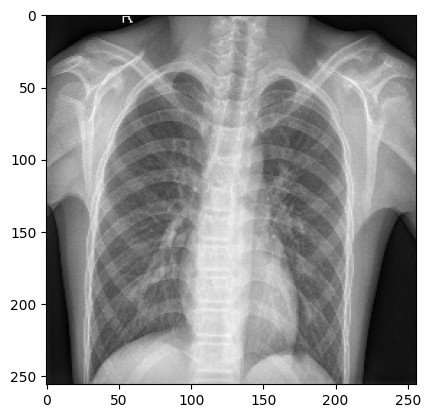

In [ ]:
# Visualizamos el elemento de la primer columna, primer fila
sample = df_0.iloc[0,0]
print(sample.shape)
print(sample)

# Visualizamos la imagen:
imagen = array_to_img(sample)
plt.imshow(imagen)

In [ ]:
# Realizamos mismo procedimiento para Pneumo
# Convertimos las imagenes a arrays

carpeta_imagenes = 'Chest_X_Ray_Images_Pneumonia/Nuevos_Datos/Pneumo/'

imagenes_1 = []

i = 0
for nombre_archivo in os.listdir(carpeta_imagenes): # Tomamos cada imagen de la carpeta
    ruta_archivo = os.path.join(carpeta_imagenes, nombre_archivo) # Tomamos la ruta de la imagen

    try:
        imagen = load_img(ruta_archivo)
        elemento = img_to_array(imagen)
        imagenes_1.append(elemento)
        i+=1

    except:
        print('\nNo fue posible agregar el elemento:' , ruta_archivo)

    else:
        print('\nImagen convertida y guardada en:' , str(i))

print('\n Proceso finalizado. Creando DF...')

etiqueta = np.repeat(1, len(imagenes_1))

df_1 = pd.DataFrame({'Imagen': imagenes_1, 'Estado': etiqueta})



Imagen convertida y guardada en: 1

Imagen convertida y guardada en: 2

Imagen convertida y guardada en: 3

Imagen convertida y guardada en: 4

Imagen convertida y guardada en: 5

Imagen convertida y guardada en: 6

Imagen convertida y guardada en: 7

Imagen convertida y guardada en: 8

Imagen convertida y guardada en: 9

Imagen convertida y guardada en: 10

Imagen convertida y guardada en: 11

Imagen convertida y guardada en: 12

Imagen convertida y guardada en: 13

Imagen convertida y guardada en: 14

Imagen convertida y guardada en: 15

Imagen convertida y guardada en: 16

Imagen convertida y guardada en: 17

Imagen convertida y guardada en: 18

Imagen convertida y guardada en: 19

Imagen convertida y guardada en: 20

Imagen convertida y guardada en: 21

Imagen convertida y guardada en: 22

Imagen convertida y guardada en: 23

Imagen convertida y guardada en: 24

Imagen convertida y guardada en: 25

Imagen convertida y guardada en: 26

Imagen convertida y guardada en: 27

Imagen co


Imagen convertida y guardada en: 250

Imagen convertida y guardada en: 251

Imagen convertida y guardada en: 252

Imagen convertida y guardada en: 253

Imagen convertida y guardada en: 254

Imagen convertida y guardada en: 255

Imagen convertida y guardada en: 256

Imagen convertida y guardada en: 257

Imagen convertida y guardada en: 258

Imagen convertida y guardada en: 259

Imagen convertida y guardada en: 260

Imagen convertida y guardada en: 261

Imagen convertida y guardada en: 262

Imagen convertida y guardada en: 263

Imagen convertida y guardada en: 264

Imagen convertida y guardada en: 265

Imagen convertida y guardada en: 266

Imagen convertida y guardada en: 267

Imagen convertida y guardada en: 268

Imagen convertida y guardada en: 269

Imagen convertida y guardada en: 270

Imagen convertida y guardada en: 271

Imagen convertida y guardada en: 272

Imagen convertida y guardada en: 273

Imagen convertida y guardada en: 274

Imagen convertida y guardada en: 275

Imagen conv


Imagen convertida y guardada en: 467

Imagen convertida y guardada en: 468

Imagen convertida y guardada en: 469

Imagen convertida y guardada en: 470

Imagen convertida y guardada en: 471

Imagen convertida y guardada en: 472

Imagen convertida y guardada en: 473

Imagen convertida y guardada en: 474

Imagen convertida y guardada en: 475

Imagen convertida y guardada en: 476

Imagen convertida y guardada en: 477

Imagen convertida y guardada en: 478

Imagen convertida y guardada en: 479

Imagen convertida y guardada en: 480

Imagen convertida y guardada en: 481

Imagen convertida y guardada en: 482

Imagen convertida y guardada en: 483

Imagen convertida y guardada en: 484

Imagen convertida y guardada en: 485

Imagen convertida y guardada en: 486

Imagen convertida y guardada en: 487

Imagen convertida y guardada en: 488

Imagen convertida y guardada en: 489

Imagen convertida y guardada en: 490

Imagen convertida y guardada en: 491

Imagen convertida y guardada en: 492

Imagen conv


Imagen convertida y guardada en: 734

Imagen convertida y guardada en: 735

Imagen convertida y guardada en: 736

Imagen convertida y guardada en: 737

Imagen convertida y guardada en: 738

Imagen convertida y guardada en: 739

Imagen convertida y guardada en: 740

Imagen convertida y guardada en: 741

Imagen convertida y guardada en: 742

Imagen convertida y guardada en: 743

Imagen convertida y guardada en: 744

Imagen convertida y guardada en: 745

Imagen convertida y guardada en: 746

Imagen convertida y guardada en: 747

Imagen convertida y guardada en: 748

Imagen convertida y guardada en: 749

Imagen convertida y guardada en: 750

Imagen convertida y guardada en: 751

Imagen convertida y guardada en: 752

Imagen convertida y guardada en: 753

Imagen convertida y guardada en: 754

Imagen convertida y guardada en: 755

Imagen convertida y guardada en: 756

Imagen convertida y guardada en: 757

Imagen convertida y guardada en: 758

Imagen convertida y guardada en: 759

Imagen conv


Imagen convertida y guardada en: 951

Imagen convertida y guardada en: 952

Imagen convertida y guardada en: 953

Imagen convertida y guardada en: 954

Imagen convertida y guardada en: 955

Imagen convertida y guardada en: 956

Imagen convertida y guardada en: 957

Imagen convertida y guardada en: 958

Imagen convertida y guardada en: 959

Imagen convertida y guardada en: 960

Imagen convertida y guardada en: 961

Imagen convertida y guardada en: 962

Imagen convertida y guardada en: 963

Imagen convertida y guardada en: 964

Imagen convertida y guardada en: 965

Imagen convertida y guardada en: 966

Imagen convertida y guardada en: 967

Imagen convertida y guardada en: 968

Imagen convertida y guardada en: 969

Imagen convertida y guardada en: 970

Imagen convertida y guardada en: 971

Imagen convertida y guardada en: 972

Imagen convertida y guardada en: 973

Imagen convertida y guardada en: 974

Imagen convertida y guardada en: 975

Imagen convertida y guardada en: 976

Imagen conv


Imagen convertida y guardada en: 1188

Imagen convertida y guardada en: 1189

Imagen convertida y guardada en: 1190

Imagen convertida y guardada en: 1191

Imagen convertida y guardada en: 1192

Imagen convertida y guardada en: 1193

Imagen convertida y guardada en: 1194

Imagen convertida y guardada en: 1195

Imagen convertida y guardada en: 1196

Imagen convertida y guardada en: 1197

Imagen convertida y guardada en: 1198

Imagen convertida y guardada en: 1199

Imagen convertida y guardada en: 1200

Imagen convertida y guardada en: 1201

Imagen convertida y guardada en: 1202

Imagen convertida y guardada en: 1203

Imagen convertida y guardada en: 1204

Imagen convertida y guardada en: 1205

Imagen convertida y guardada en: 1206

Imagen convertida y guardada en: 1207

Imagen convertida y guardada en: 1208

Imagen convertida y guardada en: 1209

Imagen convertida y guardada en: 1210

Imagen convertida y guardada en: 1211

Imagen convertida y guardada en: 1212

Imagen convertida y guar


Imagen convertida y guardada en: 1433

Imagen convertida y guardada en: 1434

Imagen convertida y guardada en: 1435

Imagen convertida y guardada en: 1436

Imagen convertida y guardada en: 1437

Imagen convertida y guardada en: 1438

Imagen convertida y guardada en: 1439

Imagen convertida y guardada en: 1440

Imagen convertida y guardada en: 1441

Imagen convertida y guardada en: 1442

Imagen convertida y guardada en: 1443

Imagen convertida y guardada en: 1444

Imagen convertida y guardada en: 1445

Imagen convertida y guardada en: 1446

Imagen convertida y guardada en: 1447

Imagen convertida y guardada en: 1448

Imagen convertida y guardada en: 1449

Imagen convertida y guardada en: 1450

Imagen convertida y guardada en: 1451

Imagen convertida y guardada en: 1452

Imagen convertida y guardada en: 1453

Imagen convertida y guardada en: 1454

Imagen convertida y guardada en: 1455

Imagen convertida y guardada en: 1456

Imagen convertida y guardada en: 1457

Imagen convertida y guar


Imagen convertida y guardada en: 1687

Imagen convertida y guardada en: 1688

Imagen convertida y guardada en: 1689

Imagen convertida y guardada en: 1690

Imagen convertida y guardada en: 1691

Imagen convertida y guardada en: 1692

Imagen convertida y guardada en: 1693

Imagen convertida y guardada en: 1694

Imagen convertida y guardada en: 1695

Imagen convertida y guardada en: 1696

Imagen convertida y guardada en: 1697

Imagen convertida y guardada en: 1698

Imagen convertida y guardada en: 1699

Imagen convertida y guardada en: 1700

Imagen convertida y guardada en: 1701

Imagen convertida y guardada en: 1702

Imagen convertida y guardada en: 1703

Imagen convertida y guardada en: 1704

Imagen convertida y guardada en: 1705

Imagen convertida y guardada en: 1706

Imagen convertida y guardada en: 1707

Imagen convertida y guardada en: 1708

Imagen convertida y guardada en: 1709

Imagen convertida y guardada en: 1710

Imagen convertida y guardada en: 1711

Imagen convertida y guar


Imagen convertida y guardada en: 1931

Imagen convertida y guardada en: 1932

Imagen convertida y guardada en: 1933

Imagen convertida y guardada en: 1934

Imagen convertida y guardada en: 1935

Imagen convertida y guardada en: 1936

Imagen convertida y guardada en: 1937

Imagen convertida y guardada en: 1938

Imagen convertida y guardada en: 1939

Imagen convertida y guardada en: 1940

Imagen convertida y guardada en: 1941

Imagen convertida y guardada en: 1942

Imagen convertida y guardada en: 1943

Imagen convertida y guardada en: 1944

Imagen convertida y guardada en: 1945

Imagen convertida y guardada en: 1946

Imagen convertida y guardada en: 1947

Imagen convertida y guardada en: 1948

Imagen convertida y guardada en: 1949

Imagen convertida y guardada en: 1950

Imagen convertida y guardada en: 1951

Imagen convertida y guardada en: 1952

Imagen convertida y guardada en: 1953

Imagen convertida y guardada en: 1954

Imagen convertida y guardada en: 1955

Imagen convertida y guar


Imagen convertida y guardada en: 2163

Imagen convertida y guardada en: 2164

Imagen convertida y guardada en: 2165

Imagen convertida y guardada en: 2166

Imagen convertida y guardada en: 2167

Imagen convertida y guardada en: 2168

Imagen convertida y guardada en: 2169

Imagen convertida y guardada en: 2170

Imagen convertida y guardada en: 2171

Imagen convertida y guardada en: 2172

Imagen convertida y guardada en: 2173

Imagen convertida y guardada en: 2174

Imagen convertida y guardada en: 2175

Imagen convertida y guardada en: 2176

Imagen convertida y guardada en: 2177

Imagen convertida y guardada en: 2178

Imagen convertida y guardada en: 2179

Imagen convertida y guardada en: 2180

Imagen convertida y guardada en: 2181

Imagen convertida y guardada en: 2182

Imagen convertida y guardada en: 2183

Imagen convertida y guardada en: 2184

Imagen convertida y guardada en: 2185

Imagen convertida y guardada en: 2186

Imagen convertida y guardada en: 2187

Imagen convertida y guar


Imagen convertida y guardada en: 2383

Imagen convertida y guardada en: 2384

Imagen convertida y guardada en: 2385

Imagen convertida y guardada en: 2386

Imagen convertida y guardada en: 2387

Imagen convertida y guardada en: 2388

Imagen convertida y guardada en: 2389

Imagen convertida y guardada en: 2390

Imagen convertida y guardada en: 2391

Imagen convertida y guardada en: 2392

Imagen convertida y guardada en: 2393

Imagen convertida y guardada en: 2394

Imagen convertida y guardada en: 2395

Imagen convertida y guardada en: 2396

Imagen convertida y guardada en: 2397

Imagen convertida y guardada en: 2398

Imagen convertida y guardada en: 2399

Imagen convertida y guardada en: 2400

Imagen convertida y guardada en: 2401

Imagen convertida y guardada en: 2402

Imagen convertida y guardada en: 2403

Imagen convertida y guardada en: 2404

Imagen convertida y guardada en: 2405

Imagen convertida y guardada en: 2406

Imagen convertida y guardada en: 2407

Imagen convertida y guar


Imagen convertida y guardada en: 2620

Imagen convertida y guardada en: 2621

Imagen convertida y guardada en: 2622

Imagen convertida y guardada en: 2623

Imagen convertida y guardada en: 2624

Imagen convertida y guardada en: 2625

Imagen convertida y guardada en: 2626

Imagen convertida y guardada en: 2627

Imagen convertida y guardada en: 2628

Imagen convertida y guardada en: 2629

Imagen convertida y guardada en: 2630

Imagen convertida y guardada en: 2631

Imagen convertida y guardada en: 2632

Imagen convertida y guardada en: 2633

Imagen convertida y guardada en: 2634

Imagen convertida y guardada en: 2635

Imagen convertida y guardada en: 2636

Imagen convertida y guardada en: 2637

Imagen convertida y guardada en: 2638

Imagen convertida y guardada en: 2639

Imagen convertida y guardada en: 2640

Imagen convertida y guardada en: 2641

Imagen convertida y guardada en: 2642

Imagen convertida y guardada en: 2643

Imagen convertida y guardada en: 2644

Imagen convertida y guar


Imagen convertida y guardada en: 2840

Imagen convertida y guardada en: 2841

Imagen convertida y guardada en: 2842

Imagen convertida y guardada en: 2843

Imagen convertida y guardada en: 2844

Imagen convertida y guardada en: 2845

Imagen convertida y guardada en: 2846

Imagen convertida y guardada en: 2847

Imagen convertida y guardada en: 2848

Imagen convertida y guardada en: 2849

Imagen convertida y guardada en: 2850

Imagen convertida y guardada en: 2851

Imagen convertida y guardada en: 2852

Imagen convertida y guardada en: 2853

Imagen convertida y guardada en: 2854

Imagen convertida y guardada en: 2855

Imagen convertida y guardada en: 2856

Imagen convertida y guardada en: 2857

Imagen convertida y guardada en: 2858

Imagen convertida y guardada en: 2859

Imagen convertida y guardada en: 2860

Imagen convertida y guardada en: 2861

Imagen convertida y guardada en: 2862

Imagen convertida y guardada en: 2863

Imagen convertida y guardada en: 2864

Imagen convertida y guar


Imagen convertida y guardada en: 3054

Imagen convertida y guardada en: 3055

Imagen convertida y guardada en: 3056

Imagen convertida y guardada en: 3057

Imagen convertida y guardada en: 3058

Imagen convertida y guardada en: 3059

Imagen convertida y guardada en: 3060

Imagen convertida y guardada en: 3061

Imagen convertida y guardada en: 3062

Imagen convertida y guardada en: 3063

Imagen convertida y guardada en: 3064

Imagen convertida y guardada en: 3065

Imagen convertida y guardada en: 3066

Imagen convertida y guardada en: 3067

Imagen convertida y guardada en: 3068

Imagen convertida y guardada en: 3069

Imagen convertida y guardada en: 3070

Imagen convertida y guardada en: 3071

Imagen convertida y guardada en: 3072

Imagen convertida y guardada en: 3073

Imagen convertida y guardada en: 3074

Imagen convertida y guardada en: 3075

Imagen convertida y guardada en: 3076

Imagen convertida y guardada en: 3077

Imagen convertida y guardada en: 3078

Imagen convertida y guar


Imagen convertida y guardada en: 3287

Imagen convertida y guardada en: 3288

Imagen convertida y guardada en: 3289

Imagen convertida y guardada en: 3290

Imagen convertida y guardada en: 3291

Imagen convertida y guardada en: 3292

Imagen convertida y guardada en: 3293

Imagen convertida y guardada en: 3294

Imagen convertida y guardada en: 3295

Imagen convertida y guardada en: 3296

Imagen convertida y guardada en: 3297

Imagen convertida y guardada en: 3298

Imagen convertida y guardada en: 3299

Imagen convertida y guardada en: 3300

Imagen convertida y guardada en: 3301

Imagen convertida y guardada en: 3302

Imagen convertida y guardada en: 3303

Imagen convertida y guardada en: 3304

Imagen convertida y guardada en: 3305

Imagen convertida y guardada en: 3306

Imagen convertida y guardada en: 3307

Imagen convertida y guardada en: 3308

Imagen convertida y guardada en: 3309

Imagen convertida y guardada en: 3310

Imagen convertida y guardada en: 3311

Imagen convertida y guar


Imagen convertida y guardada en: 3509

Imagen convertida y guardada en: 3510

Imagen convertida y guardada en: 3511

Imagen convertida y guardada en: 3512

Imagen convertida y guardada en: 3513

Imagen convertida y guardada en: 3514

Imagen convertida y guardada en: 3515

Imagen convertida y guardada en: 3516

Imagen convertida y guardada en: 3517

Imagen convertida y guardada en: 3518

Imagen convertida y guardada en: 3519

Imagen convertida y guardada en: 3520

Imagen convertida y guardada en: 3521

Imagen convertida y guardada en: 3522

Imagen convertida y guardada en: 3523

Imagen convertida y guardada en: 3524

Imagen convertida y guardada en: 3525

Imagen convertida y guardada en: 3526

Imagen convertida y guardada en: 3527

Imagen convertida y guardada en: 3528

Imagen convertida y guardada en: 3529

Imagen convertida y guardada en: 3530

Imagen convertida y guardada en: 3531

Imagen convertida y guardada en: 3532

Imagen convertida y guardada en: 3533

Imagen convertida y guar


Imagen convertida y guardada en: 3733

Imagen convertida y guardada en: 3734

Imagen convertida y guardada en: 3735

Imagen convertida y guardada en: 3736

Imagen convertida y guardada en: 3737

Imagen convertida y guardada en: 3738

Imagen convertida y guardada en: 3739

Imagen convertida y guardada en: 3740

Imagen convertida y guardada en: 3741

Imagen convertida y guardada en: 3742

Imagen convertida y guardada en: 3743

Imagen convertida y guardada en: 3744

Imagen convertida y guardada en: 3745

Imagen convertida y guardada en: 3746

Imagen convertida y guardada en: 3747

Imagen convertida y guardada en: 3748

Imagen convertida y guardada en: 3749

Imagen convertida y guardada en: 3750

Imagen convertida y guardada en: 3751

Imagen convertida y guardada en: 3752

Imagen convertida y guardada en: 3753

Imagen convertida y guardada en: 3754

Imagen convertida y guardada en: 3755

Imagen convertida y guardada en: 3756

Imagen convertida y guardada en: 3757

Imagen convertida y guar


Imagen convertida y guardada en: 3955

Imagen convertida y guardada en: 3956

Imagen convertida y guardada en: 3957

Imagen convertida y guardada en: 3958

Imagen convertida y guardada en: 3959

Imagen convertida y guardada en: 3960

Imagen convertida y guardada en: 3961

Imagen convertida y guardada en: 3962

Imagen convertida y guardada en: 3963

Imagen convertida y guardada en: 3964

Imagen convertida y guardada en: 3965

Imagen convertida y guardada en: 3966

Imagen convertida y guardada en: 3967

Imagen convertida y guardada en: 3968

Imagen convertida y guardada en: 3969

Imagen convertida y guardada en: 3970

Imagen convertida y guardada en: 3971

Imagen convertida y guardada en: 3972

Imagen convertida y guardada en: 3973

Imagen convertida y guardada en: 3974

Imagen convertida y guardada en: 3975

Imagen convertida y guardada en: 3976

Imagen convertida y guardada en: 3977

Imagen convertida y guardada en: 3978

Imagen convertida y guardada en: 3979

Imagen convertida y guar


Imagen convertida y guardada en: 4176

Imagen convertida y guardada en: 4177

Imagen convertida y guardada en: 4178

Imagen convertida y guardada en: 4179

Imagen convertida y guardada en: 4180

Imagen convertida y guardada en: 4181

Imagen convertida y guardada en: 4182

Imagen convertida y guardada en: 4183

Imagen convertida y guardada en: 4184

Imagen convertida y guardada en: 4185

Imagen convertida y guardada en: 4186

Imagen convertida y guardada en: 4187

Imagen convertida y guardada en: 4188

Imagen convertida y guardada en: 4189

Imagen convertida y guardada en: 4190

Imagen convertida y guardada en: 4191

Imagen convertida y guardada en: 4192

Imagen convertida y guardada en: 4193

Imagen convertida y guardada en: 4194

Imagen convertida y guardada en: 4195

Imagen convertida y guardada en: 4196

Imagen convertida y guardada en: 4197

Imagen convertida y guardada en: 4198

Imagen convertida y guardada en: 4199

Imagen convertida y guardada en: 4200

Imagen convertida y guar

In [ ]:
print(df_1.shape)
df_1.head()

(4274, 2)


,Imagen,Estado
0,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [2.0, 2.0,...",1
1,"[[[22.0, 22.0, 22.0], [23.0, 23.0, 23.0], [30....",1
2,"[[[169.0, 169.0, 169.0], [172.0, 172.0, 172.0]...",1
3,"[[[13.0, 13.0, 13.0], [14.0, 14.0, 14.0], [13....",1
4,"[[[30.0, 30.0, 30.0], [33.0, 33.0, 33.0], [36....",1


(256, 256, 3)
[[[0. 0. 0.]
  [0. 0. 0.]
  [2. 2. 2.]
  ...
  [1. 1. 1.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[1. 1. 1.]
  [2. 2. 2.]
  [1. 1. 1.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [1. 1. 1.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


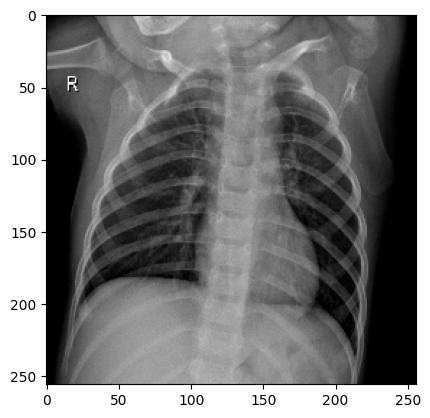

In [ ]:
# Visualizamos un elemento
sample = df_1.iloc[0,0]
print(sample.shape)
print(sample)

# Visualizamos la imagen:
imagen = array_to_img(sample)
plt.imshow(imagen)

# En esta parte juntamos los DataFrame:

In [ ]:
print(df_0.shape)
print(df_1.shape)

df_3 = pd.concat( [df_0, df_1], ignore_index=True )

print(df_3.shape)
# Guardamos el archivo:
df_3.to_pickle('Datos_Pneumo_5857.pkl')

(1583, 2)
(4274, 2)
(5857, 2)


# Verificamos el DataFrame

(256, 256, 3)
[[[18. 18. 18.]
  [16. 16. 16.]
  [16. 16. 16.]
  ...
  [20. 20. 20.]
  [21. 21. 21.]
  [21. 21. 21.]]

 [[16. 16. 16.]
  [15. 15. 15.]
  [16. 16. 16.]
  ...
  [19. 19. 19.]
  [20. 20. 20.]
  [21. 21. 21.]]

 [[16. 16. 16.]
  [15. 15. 15.]
  [16. 16. 16.]
  ...
  [19. 19. 19.]
  [18. 18. 18.]
  [20. 20. 20.]]

 ...

 [[42. 42. 42.]
  [33. 33. 33.]
  [30. 30. 30.]
  ...
  [23. 23. 23.]
  [23. 23. 23.]
  [22. 22. 22.]]

 [[44. 44. 44.]
  [34. 34. 34.]
  [31. 31. 31.]
  ...
  [27. 27. 27.]
  [27. 27. 27.]
  [26. 26. 26.]]

 [[46. 46. 46.]
  [34. 34. 34.]
  [31. 31. 31.]
  ...
  [32. 32. 32.]
  [31. 31. 31.]
  [30. 30. 30.]]]


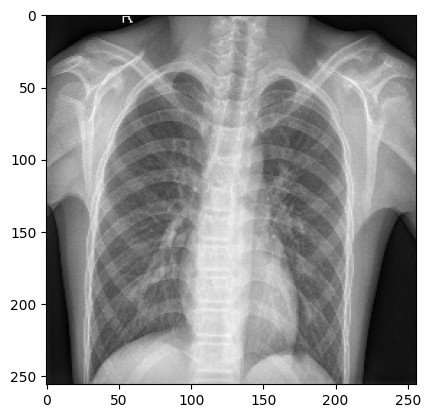

In [ ]:
df_prueba = pd.read_pickle('Datos_Pneumo_5857.pkl')

# Visualizamos un elemento
sample = df_prueba.iloc[0,0]
print(sample.shape)
print(sample)

# Visualizamos la imagen:
imagen = array_to_img(sample)
plt.imshow(imagen)